<a href="https://colab.research.google.com/github/Irfannabi007/Project-Edge-/blob/main/RenalRisk_Predicting_Chronic_Kidney_Disease_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing dataset**

In [2]:
import pandas as pd
data=pd.read_csv("/content/kidney_disease_dataset.csv")

In [3]:
#Overview of dataset
data.head()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
0,71,0.30,40.9,0,1,46.8,1622.0,1,0
1,34,1.79,17.1,0,0,43.8,1428.0,1,0
2,80,2.67,15.0,0,1,78.2,1015.0,1,0
3,40,0.97,31.1,0,1,92.8,1276.0,1,0
4,43,2.05,22.8,1,1,62.2,1154.0,0,0


In [4]:
data.info()#Searching for null values and dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2304 non-null   int64  
 1   Creatinine_Level  2304 non-null   float64
 2   BUN               2304 non-null   float64
 3   Diabetes          2304 non-null   int64  
 4   Hypertension      2304 non-null   int64  
 5   GFR               2304 non-null   float64
 6   Urine_Output      2304 non-null   float64
 7   CKD_Status        2304 non-null   int64  
 8   Dialysis_Needed   2304 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 162.1 KB


In [5]:
data=data.drop(columns=['Dialysis_Needed'])#removing unnecessary data

In [6]:
x=data.drop(columns=['CKD_Status'])#Independent Variables
y=data['CKD_Status']               #Dependent Variables

Creating train dataset and test dataset

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [9]:
#Calculating mean square error
from sklearn.metrics import mean_squared_error as mse
predicted=lr.predict(x_test)
error=mse(y_test,predicted)
print("Mean Squared Error:",error)

Mean Squared Error: 0.12905868848449414


**Model Fitting**

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
models=[DecisionTreeRegressor(),RandomForestRegressor(),LinearRegression(),LogisticRegression(),KNeighborsClassifier(),SVC(),GaussianNB(),GradientBoostingClassifier()]
errors={}
for model in models:
  model.fit(x_train,y_train)
  name=type(model).__name__
  errors[name]=model.score(x_test,y_test)*100

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
errors #OUTPUT

{'DecisionTreeRegressor': 100.0,
 'RandomForestRegressor': 99.97603044053697,
 'LinearRegression': 48.142027726577474,
 'LogisticRegression': 82.21258134490239,
 'KNeighborsClassifier': 78.30802603036877,
 'SVC': 71.58351409978309,
 'GaussianNB': 90.23861171366593,
 'GradientBoostingClassifier': 100.0}

**Graphical representaton**

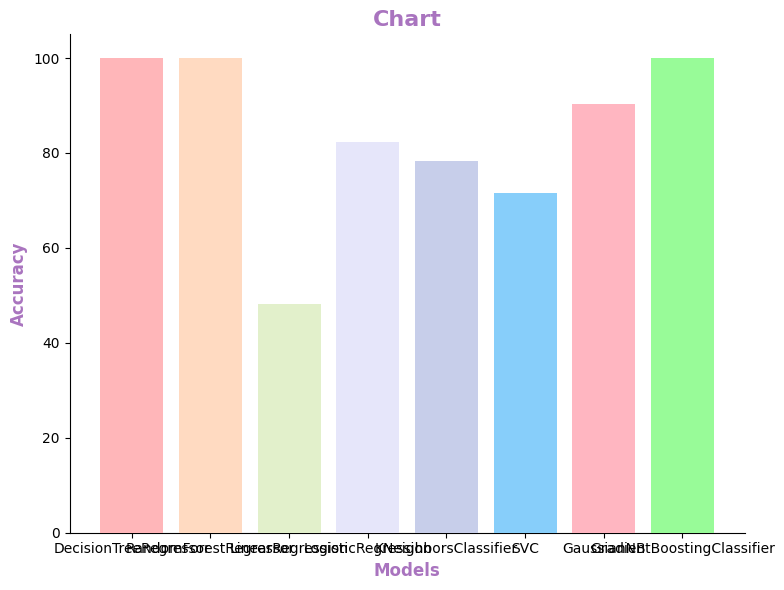

In [18]:
import matplotlib.pyplot as plt
cute_colors=['#FFB6B9','#FFDAC1','#E2F0CB','#E6E6FA','#C7CEEA','#87CEFA','#FFB6C1','#98FB98']
plt.figure(figsize=(8,6))
bars=plt.bar(errors.keys(),errors.values(),color=cute_colors[:len(errors)])

for bar in bars:
  bar.set_linewidth(0)
  bar.set_edgecolor('none')
  bar.set_zorder(3)

plt.title('Chart',fontsize=16,fontweight='bold',color='#A974BF')
plt.xlabel('Models',fontsize=12,fontweight='bold',color='#A974BF')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold',color='#A974BF')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()



**Confusion matrix and classification report**



--- LogisticRegression ---
Confusion Matrix:
[[194  52]
 [ 32 183]]


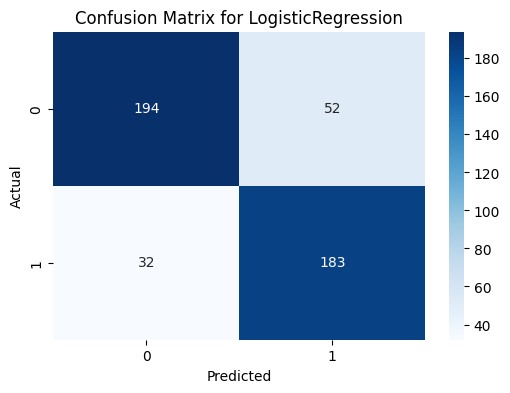

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       246
           1       0.78      0.85      0.81       215

    accuracy                           0.82       461
   macro avg       0.82      0.82      0.82       461
weighted avg       0.82      0.82      0.82       461

Accuracy Score: 0.8177874186550976


--- KNeighborsClassifier ---
Confusion Matrix:
[[203  43]
 [ 57 158]]


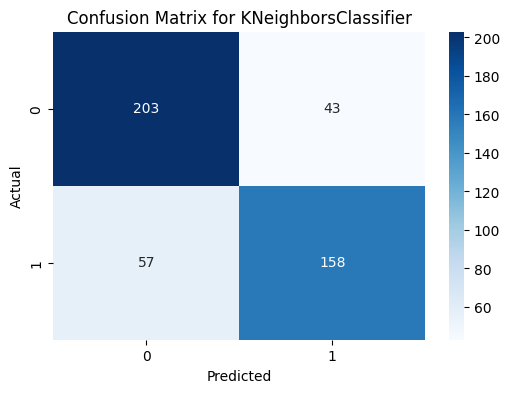

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       246
           1       0.79      0.73      0.76       215

    accuracy                           0.78       461
   macro avg       0.78      0.78      0.78       461
weighted avg       0.78      0.78      0.78       461

Accuracy Score: 0.7830802603036876


--- SVC ---
Confusion Matrix:
[[153  93]
 [ 38 177]]


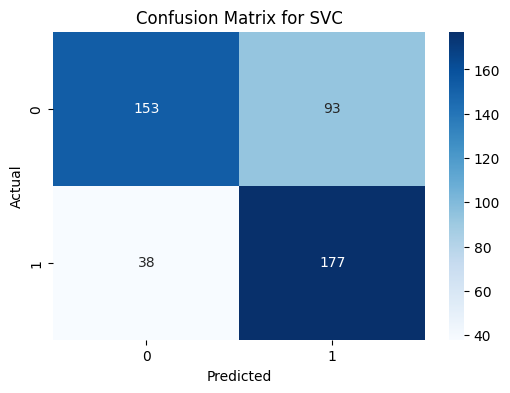

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       246
           1       0.66      0.82      0.73       215

    accuracy                           0.72       461
   macro avg       0.73      0.72      0.72       461
weighted avg       0.73      0.72      0.71       461

Accuracy Score: 0.7158351409978309


--- GaussianNB ---
Confusion Matrix:
[[215  31]
 [ 14 201]]


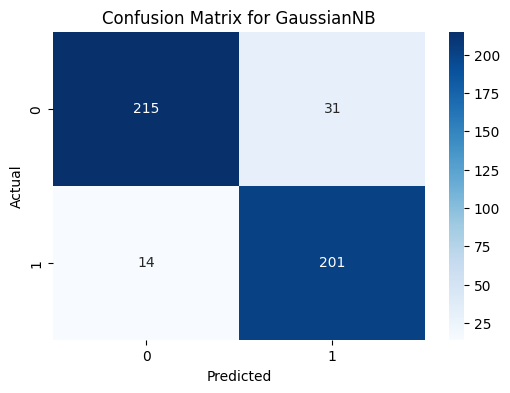

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       246
           1       0.87      0.93      0.90       215

    accuracy                           0.90       461
   macro avg       0.90      0.90      0.90       461
weighted avg       0.91      0.90      0.90       461

Accuracy Score: 0.9023861171366594


--- GradientBoostingClassifier ---
Confusion Matrix:
[[246   0]
 [  0 215]]


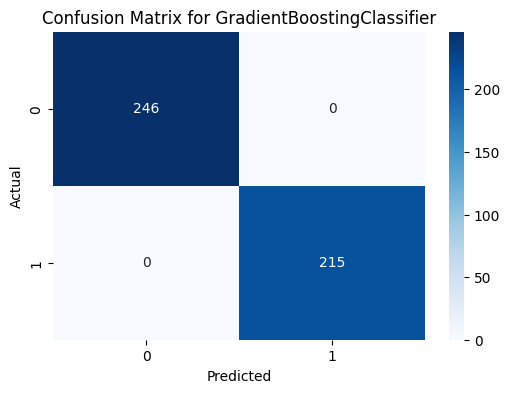

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00       215

    accuracy                           1.00       461
   macro avg       1.00      1.00      1.00       461
weighted avg       1.00      1.00      1.00       461

Accuracy Score: 1.0




In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming fitted_classification_models dictionary is available from the previous cell
if 'fitted_classification_models' in locals():
    for name, model in fitted_classification_models.items():
        print(f"--- {name} ---")
        y_pred = model.predict(x_test)

        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)

        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        print("Accuracy Score:", accuracy_score(y_test, y_pred))
        print("\n")
else:
    print("Fitted classification models not found. Please run the previous cell to fit the models.")

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

# Separate regression and classification models
regression_models = [DecisionTreeRegressor(), RandomForestRegressor(), LinearRegression()]
classification_models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), SVC(), GaussianNB(), GradientBoostingClassifier()]

# Fit regression models and store scores
regression_errors = {}
for model in regression_models:
    model.fit(x_train, y_train)
    name = type(model).__name__
    regression_errors[name] = model.score(x_test, y_test) * 100

# Fit classification models and store fitted models and scores
fitted_classification_models = {}
classification_errors = {}
for model in classification_models:
    model.fit(x_train, y_train)
    name = type(model).__name__
    fitted_classification_models[name] = model # Store the fitted model
    classification_errors[name] = model.score(x_test, y_test) * 100

print("Regression Model Scores:")
print(regression_errors)
print("\nClassification Model Scores:")
print(classification_errors)

Regression Model Scores:
{'DecisionTreeRegressor': 100.0, 'RandomForestRegressor': 99.97733787105312, 'LinearRegression': 48.142027726577474}

Classification Model Scores:
{'LogisticRegression': 81.77874186550976, 'KNeighborsClassifier': 78.30802603036877, 'SVC': 71.58351409978309, 'GaussianNB': 90.23861171366593, 'GradientBoostingClassifier': 100.0}
